# Prototype notebook to semantically represent Learning Path with Schema.org

authors: Phil Reed, Alban Gaignard, Leyla Jael Castro

contributors: Nick Juty, Roman Baum

- Initially drafted the 20th of November 2025, as part of Bioschemas activities and ELIXIR BioHackathon Europe 2025.
- Refined at de.NBI BioHackathon Germany 2025.
- To be revised by the community.

Any questions, please contact phil.reed@manchester.ac.uk, alban.gaignard@univ-nantes.fr



In [107]:
!pip install rdflib

python(48878) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


# Sample Learning path 1
https://tess.elixir-europe.org/learning_paths/introduction-to-galaxy-and-sequence-analysis-6384c0ed-3546-41cf-ac30-bff8680dd96c

LP structure: 

**Introduction to Galaxy and Sequence analysis** [syllabusSections=M1,M2]
- **Module 1: Introduction to Galaxy** [itemListElement=11,12] [nextItem=M2]
  - (1.1) A short introduction to Galaxy [nextItem=12]
  - (1.2) Galaxy Basics for genomics [nextItem=21]
- **Module 2: Basics of Genome Sequence Analysis** [itemListElement=21,22,23,24]
  - (2.1) Quality Control [nextItem=22]
  - (2.2) Mapping [nextItem=23]
  - (2.3) An Introduction to Genome Assembly [nextItem=24]
  - (2.4) Chloroplast genome assembly 



In [ ]:
from rdflib import Graph

my_learning_path_1 = """
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix ex: <http://example.org/> .
ex:GA_learning_path a schema:Course ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPath> ;
    schema:name "Introduction to Galaxy and Sequence analysis" ;
    schema:description "This learning path aims to teach you the basics of Galaxy and analysis of sequencing data. " ;
    schema:provider ex:ExampleUniversity ;
    schema:courseCode "GSA101" ;
    schema:syllabusSections ex:Module_2, ex:Module_1 .
	
ex:Module_1 a schema:Syllabus, schema:Course, schema:ListItem, schema:ItemList ;  
    dct:conformsTo <https://bioschemas.org/profiles/LearningPathModule> ;
    schema:name "Module 1: Introduction to Galaxy" ;
    schema:teaches "Learn how to create a workflow" ;
    schema:nextItem ex:Module_2 ;
    schema:itemListElement ex:TM11, ex:TM12 .
ex:TM11 a schema:LearningResource, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/TrainingMaterial> ;
    schema:name "(1.1) A short introduction to Galaxy" ;
    schema:description "What is Galaxy" ;
    schema:url "https://tess.elixir-europe.org/materials/hands-on-for-a-short-introduction-to-galaxy-tutorial?lp=1%3A1" ;
    schema:nextItem ex:TM12 .
ex:TM12 a schema:LearningResource, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/TrainingMaterial> ;
    schema:name "(1.2) Galaxy Basics for genomics" ;
    schema:description "The basic details for Galaxy genomics" ;
    schema:nextItem ex:TM21 .

ex:Module_2 a schema:Syllabus, schema:Course,  schema:ListItem, schema:ItemList  ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPathModule> ;
    schema:name "Module 2: Basics of Genome Sequence Analysis" ;
    schema:teaches "Use genome browser to understand your data" ;
    schema:itemListElement ex:TM21, ex:TM22, ex:TM23, ex:TM24 .
ex:TM21 a schema:LearningResource, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/TrainingMaterial> ;
    schema:name "(2.1) Quality Control" ;
    schema:description "Ensure you follow quality control practices" ;
    schema:nextItem ex:TM22 .
ex:TM22 a schema:LearningResource, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/TrainingMaterial> ;
    schema:name "(2.2) Mapping" ;
    schema:description "Alignment and mapping" ;
    schema:nextItem ex:TM23 .
ex:TM23 a schema:LearningResource, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/TrainingMaterial> ;
    schema:name "(2.3) An Introduction to Genome Assembly" ;
    schema:description "Description of TrainingMaterial 23" ;
    schema:nextItem ex:TM24 .
ex:TM24 a schema:LearningResource, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/TrainingMaterial> ;
    schema:name "(2.4) Chloroplast genome assembly" ;
    schema:description "Description of TrainingMaterial 24"  .
"""

kg_1 = Graph()
kg_1.parse(data=my_learning_path_1, format="turtle")
kg_1.serialize(destination="lp1.ttl", format="turtle")
kg_1.serialize(destination="lp1.jsonld", format="json-ld")

<Graph identifier=Nc84696929fe44a2aba5adb8c18fbeb1c (<class 'rdflib.graph.Graph'>)>

In [109]:
print(kg_1.serialize(format="turtle"))
print(len(kg_1))

@prefix dct: <http://purl.org/dc/terms/> .
@prefix ex: <http://example.org/> .
@prefix schema: <https://schema.org/> .

ex:GA_learning_path a schema:Course ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPath> ;
    schema:courseCode "GSA101" ;
    schema:description "This learning path aims to teach you the basics of Galaxy and analysis of sequencing data. " ;
    schema:name "Introduction to Galaxy and Sequence analysis" ;
    schema:provider ex:ExampleUniversity ;
    schema:syllabusSections ex:Module_1,
        ex:Module_2 .

ex:Module_1 a schema:ItemList,
        schema:ListItem,
        schema:Syllabus ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPathModule> ;
    schema:itemListElement ex:TM11,
        ex:TM12 ;
    schema:name "Module 1: Introduction to Galaxy" ;
    schema:nextItem ex:Module_2 ;
    schema:teaches "Learn how to create a workflow" .

ex:TM11 a schema:LearningResource,
        schema:ListItem ;
    dct:conformsTo <https://bioschema

In [110]:
print(kg_1.serialize(format="json-ld"))

[
  {
    "@id": "http://example.org/GA_learning_path",
    "@type": [
      "https://schema.org/Course"
    ],
    "http://purl.org/dc/terms/conformsTo": [
      {
        "@id": "https://bioschemas.org/profiles/LearningPath"
      }
    ],
    "https://schema.org/courseCode": [
      {
        "@value": "GSA101"
      }
    ],
    "https://schema.org/description": [
      {
        "@value": "This learning path aims to teach you the basics of Galaxy and analysis of sequencing data. "
      }
    ],
    "https://schema.org/name": [
      {
        "@value": "Introduction to Galaxy and Sequence analysis"
      }
    ],
    "https://schema.org/provider": [
      {
        "@id": "http://example.org/ExampleUniversity"
      }
    ],
    "https://schema.org/syllabusSections": [
      {
        "@id": "http://example.org/Module_2"
      },
      {
        "@id": "http://example.org/Module_1"
      }
    ]
  },
  {
    "@id": "http://example.org/TM23",
    "@type": [
      "https://schema.o

In [124]:
# I'm interested in a specific training material, what should be the prerequisites ?

tm_of_interest = "(2.3) An Introduction to Genome Assembly"

def query_learning_path(kg, tm_of_interest):
  query = f"""
  SELECT * WHERE {{
    ?s schema:name "{tm_of_interest}" .
    ?prereq schema:nextItem+ ?s .
    ?prereq schema:name ?prereq_name .
    ?a_module schema:itemListElement ?prereq .
    ?a_module schema:name ?module_name .
  }}
  """
  # Run SPARQL query
  res_kg = kg.query(query)
  print(f'If you are interested in {tm_of_interest}')
  for r in res_kg:
    print(f'You need to perform {r["prereq_name"]} as part of the module {r["module_name"]}')
  return res_kg

query_learning_path(kg_1, tm_of_interest)

If you are interested in (2.3) An Introduction to Genome Assembly
You need to perform (2.2) Mapping as part of the module Module 2: Basics of Genome Sequence Analysis
You need to perform (2.1) Quality Control as part of the module Module 2: Basics of Genome Sequence Analysis
You need to perform (1.2) Galaxy Basics for genomics as part of the module Module 1: Introduction to Galaxy
You need to perform (1.1) A short introduction to Galaxy as part of the module Module 1: Introduction to Galaxy


## What we did until now

1.  **RDF Graph Initialization**: We loaded a learning path described in Turtle format into an RDFLib graph (`kg`). We extensively used Schema.org to model the LearningPath Syllabus, ItemList and ListItem types, as well as Course and LearningResource types.
2.  **Prerequisite Query**: We demonstrated how to query the graph using SPARQL to find prerequisites for a specific learning material.


# Visualization of the Schema.org metadata

In [126]:
from rdflib import Graph, Literal, URIRef
from rdflib.namespace import RDF, RDFS, OWL, XSD

def extract_relationships_and_names(graph):
    # Define prefixes
    schema = URIRef("https://schema.org/")
    ex = URIRef("http://example.org/")

    # 1. Query for all entities with a schema:name and store their names
    entity_names = {}
    name_query = """
    PREFIX schema: <https://schema.org/>
    SELECT ?entity ?name
    WHERE {
        ?entity schema:name ?name .
    }
    """
    for row in graph.query(name_query):
        entity_names[str(row.entity)] = str(row.name)

    print("Extracted entity names:")
    for uri, name in entity_names.items():
        print(f"  {uri}: {name}")

    # 2. Query for sequential relationships
    relationships_query = """
    PREFIX schema: <https://schema.org/>
    SELECT ?s ?p ?o
    WHERE {
        ?s ?p ?o .
        FILTER (?p = schema:nextItem || ?p = schema:itemListElement || ?p = schema:step)
    }
    """
    raw_relationships = []
    for row in graph.query(relationships_query):
        raw_relationships.append((str(row.s), str(row.p), str(row.o)))

    print("\nExtracted raw relationships:")
    for rel in raw_relationships:
        print(f"  {rel[0]} -- {rel[1]} --> {rel[2]}")

    # 3. Transform relationships to use names
    mermaid_edges = []
    for s_uri, p_uri, o_uri in raw_relationships:
        s_name = entity_names.get(s_uri, s_uri.split('/')[-1]) # Use URI fragment if name not found
        o_name = entity_names.get(o_uri, o_uri.split('/')[-1]) # Use URI fragment if name not found
        predicate_type = p_uri.split('/')[-1] # Get predicate name (e.g., nextItem)
        mermaid_edges.append((s_name, predicate_type, o_name))

    print("\nTransformed relationships for Mermaid diagram:")
    for edge in mermaid_edges:
        print(f"  {edge[0]} -- {edge[1]} --> {edge[2]}")

    return entity_names, mermaid_edges

# Call the function with the existing kg graph
all_entity_names, all_mermaid_edges = extract_relationships_and_names(kg_1)

# Assign to the global query_learning_path function as well if needed later
def query_learning_path():
    return all_entity_names, all_mermaid_edges

print("Relationship extraction complete. Results stored in all_entity_names and all_mermaid_edges.")

Extracted entity names:
  http://example.org/GA_learning_path: Introduction to Galaxy and Sequence analysis
  http://example.org/Module_1: Module 1: Introduction to Galaxy
  http://example.org/TM11: (1.1) A short introduction to Galaxy
  http://example.org/TM12: (1.2) Galaxy Basics for genomics
  http://example.org/Module_2: Module 2: Basics of Genome Sequence Analysis
  http://example.org/TM21: (2.1) Quality Control
  http://example.org/TM22: (2.2) Mapping
  http://example.org/TM23: (2.3) An Introduction to Genome Assembly
  http://example.org/TM24: (2.4) Chloroplast genome assembly

Extracted raw relationships:
  http://example.org/TM11 -- https://schema.org/nextItem --> http://example.org/TM12
  http://example.org/TM23 -- https://schema.org/nextItem --> http://example.org/TM24
  http://example.org/Module_2 -- https://schema.org/itemListElement --> http://example.org/TM23
  http://example.org/Module_2 -- https://schema.org/itemListElement --> http://example.org/TM24
  http://example.

In [113]:
mermaid_lines = []
mermaid_lines.append('graph TD')

for s_name, p_type, o_name in all_mermaid_edges:
    # Sanitize names for Mermaid if they contain special characters or spaces
    # Mermaid node IDs cannot contain spaces or special characters directly
    # We'll use a simple approach: if a name has spaces, enclose it in quotes.
    # For simplicity, we'll map original names to safe IDs and use names for labels

    # Create a unique ID for each node if it's not already in the entity_names (which are already unique names)
    # For this exercise, we will assume the names are unique enough for node IDs or simply use them as both ID and label.
    # Mermaid allows IDs with spaces if quoted, but it's cleaner to have simple IDs.
    # However, given the prompt directly asks for f'{source_name} -- {predicate_type} --> {target_name}',
    # we will use the names as they are, and Mermaid should handle simple spaces correctly in labels.

    # Let's ensure node labels are quoted if they contain spaces to be robust
    # Mermaid syntax: A["Node Name"] or A --> B["Another Node"]
    # For simplicity, let's use the names directly as node IDs and labels.
    # Mermaid handles spaces in node labels gracefully if they are quoted, but for connections
    # the IDs should be simple. Let's make sure our approach is compatible.

    # A common Mermaid practice is to have a simple ID for the node and then a label
    # like: ID[Label]. If we use the name as ID, it should not have spaces.
    # Given the previous step produced names like 'Module 1', we should create a mapping for node IDs.

    # Let's refine how we generate the Mermaid lines to ensure valid syntax
    # Create a mapping from clean name to a unique, mermaid-safe ID
    # This mapping is important to handle cases where names might have characters that Mermaid IDs don't like
    node_id_map = {}
    counter = 0
    for uri_name in all_entity_names.values():
        clean_name = uri_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip()
        if clean_name not in node_id_map.values():
            node_id_map[uri_name] = f'N{counter}'
            counter += 1

    # Create mermaid lines with unique IDs and original names as labels
    mermaid_lines = ['graph TD']
    for s_name, p_type, o_name in all_mermaid_edges:
        source_id = node_id_map.get(s_name, s_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip())
        target_id = node_id_map.get(o_name, o_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip())

        # Add node definitions with labels if they contain spaces
        if ' ' in s_name:
            mermaid_lines.append(f'{source_id}[\"{s_name}\"]')
        if ' ' in o_name:
            mermaid_lines.append(f'{target_id}[\"{o_name}\"]')

        mermaid_lines.append(f'{source_id} -- {p_type} --> {target_id}')

mermaid_syntax = '\n'.join(mermaid_lines)

# save mermaid file to disk
with open("lp1.mmd", "w") as mermaid_file:
    print(mermaid_syntax, file=mermaid_file)

# display the markdown mermaid graph as output of this cell
print(mermaid_syntax)

graph TD
N2["(1.1) A short introduction to Galaxy"]
N3["(1.2) Galaxy Basics for genomics"]
N2 -- nextItem --> N3
N7["(2.3) An Introduction to Genome Assembly"]
N8["(2.4) Chloroplast genome assembly"]
N7 -- nextItem --> N8
N4["Module 2: Basics of Genome Sequence Analysis"]
N7["(2.3) An Introduction to Genome Assembly"]
N4 -- itemListElement --> N7
N4["Module 2: Basics of Genome Sequence Analysis"]
N8["(2.4) Chloroplast genome assembly"]
N4 -- itemListElement --> N8
N4["Module 2: Basics of Genome Sequence Analysis"]
N6["(2.2) Mapping"]
N4 -- itemListElement --> N6
N6["(2.2) Mapping"]
N7["(2.3) An Introduction to Genome Assembly"]
N6 -- nextItem --> N7
N5["(2.1) Quality Control"]
N6["(2.2) Mapping"]
N5 -- nextItem --> N6
N4["Module 2: Basics of Genome Sequence Analysis"]
N5["(2.1) Quality Control"]
N4 -- itemListElement --> N5
N1["Module 1: Introduction to Galaxy"]
N3["(1.2) Galaxy Basics for genomics"]
N1 -- itemListElement --> N3
N1["Module 1: Introduction to Galaxy"]
N2["(1.1) A short 

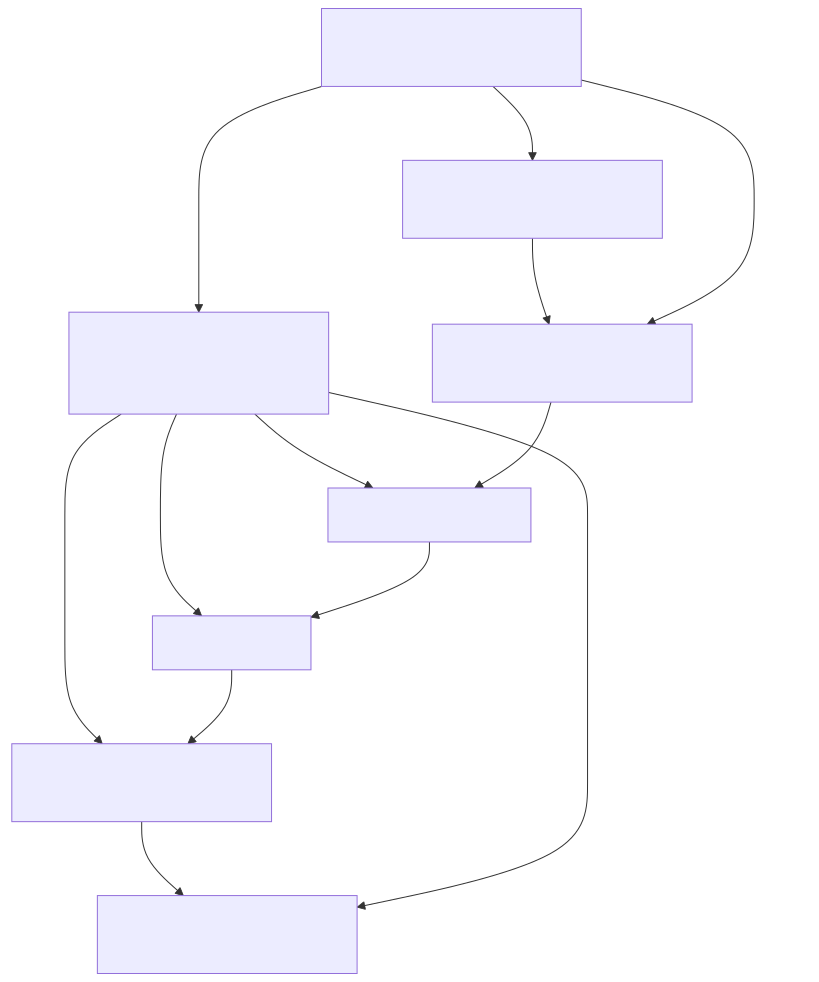

In [114]:
#from IPython.display import display, Markdown
#Markdown(mermaid_syntax)

import base64
from IPython.display import display_svg
from urllib.request import Request, urlopen

def mm(graph):
    graphbytes = graph.encode("ascii")
    base64_bytes = base64.b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    url="https://mermaid.ink/svg/" + base64_string
    req=Request(url, headers={'User-Agent': 'IPython/Notebook'})
    display_svg(urlopen(req).read().decode(), raw=True)
mm(mermaid_syntax)

# Sample Learning path 2
This is a module of a learning path graph where each item is a course instance (event), not a training material. They provide a linear reduction which we will model. This reduction supports the prerequisites in a simplified way, and ignores courses from other modules (Open Oriented Programming). 

![Course portfolio](https://www.helmholtz-hida.de/hida-files/_processed_/f/1/csm_Open_Research_01d85dd865.png)

https://www.helmholtz-hida.de/en/discover-hida/helmholtz-information-data-science-framework/data-science-course-portfolio/

LP structure: 

**Helmholtz Data Science Course Portfolio** [syllabusSections=M1]
- **Module: Open Research** [itemListElement=1,2,3,4,5,6,7]
  - (1) Kickstart Shell & Git [nextItem=2]
    - 22-23 September 2025
  - (2) Introduction to Git & GitLab [nextItem=3]
    - 15-16 September 2025
    - 24-25 November 2025
  - (3) Foundations of Research Software Publication [nextItem=4]
    - 6-7 November 2025
  - (4) Continuous Integration [nextItem=5]
    - 28-29 October 2025
    - 16-17 December 2025
  - (5) Fundamentals of Software Testing [nextItem=6]
    - No instances yet
  - (6) Reproducible and Open Research [nextItem=7] 
    - 19 November 2025
  - (7) AI Ethics: Model Cards for Model Reporting
    - 17 October 2025

Each course may have multiple course instances.

In [119]:
my_learning_path_2 = """
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <https://schema.org/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix hz: <http://helmholtz-hida.de/> .
hz:HZ_learning_path a schema:Course ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPath> ;
    schema:name "Helmholtz Data Science Course Portfolio" ;
    schema:description "The platforms of the Information & Data Science Framework have developed a coordinated course offer that covers a wide array of topics." ;
    schema:provider hz:Helmholtz ;
    schema:courseCode "data-science-course-portfolio" ;
    schema:syllabusSections hz:Module_1 .
	
hz:Module_1 a schema:Syllabus, schema:Course, schema:ListItem, schema:ItemList ;  
    dct:conformsTo <https://bioschemas.org/profiles/LearningPathModule> ;
    schema:name "Open Research" ;
    schema:description "Unlock the potential of open science through courses on collaborative research practices and project management, open-source tools and software, and publishing ethically sound, reproducible, and transparent results." ;
    schema:teaches "Learn how to support open science" ;
    schema:itemListElement hz:TM1, hz:TM2, hz:TM3, hz:TM4, hz:TM5, hz:TM6, hz:TM7 .

hz:TM1 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(1) Kickstart Shell & Git" ;
    schema:description "Boost your research efficiency with this workshop on Bash scripting and Git version control. Learn to automate tasks with custom scripts and track your work with Git" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/kickstart-shell-git/" ;
    schema:nextItem hz:TM2 ;
    schema:hasCourseInstance hz:TM1a.
hz:TM1a a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-09-22T09:00:00" ;
    schema:endDate "2025-09-23T17:00:00" .

hz:TM2 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(2) Introduction to Git & GitLab" ;
    schema:description "Get hands-on with version control in this practical workshop. Learn to use Git alongside GitLab through live coding sessions, applying each step directly to your projects" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/introduction-to-git-and-gitlab/" ;
    schema:teaches "Apply a basic GitLab contribution workflow using issues and merge requests" ;
    schema:nextItem hz:TM3 ;
    schema:hasCourseInstance hz:TM2a, hz:TM2b.
hz:TM2a a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-09-15T09:00:00" ;
    schema:endDate "2025-09-16T17:00:00" .
hz:TM2b a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-11-24T09:00:00" ;
    schema:endDate "2025-11-25T17:00:00" .

hz:TM3 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(3) Foundations of Research Software Publication" ;
    schema:description "Learn best practices for preparing research software for publication in this workshop. Gain actionable insights and apply them to a data analysis script for practical understanding" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/foundations-of-research-software-publication/" ;
    schema:nextItem hz:TM4 ;
    schema:hasCourseInstance hz:TM3a.
hz:TM3a a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-11-06T09:00:00" ;
    schema:endDate "2025-11-07T17:00:00" .

hz:TM4 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(4) Continuous Integration" ;
    schema:description "Continuous integration (CI) helps automate testing and standardization to ensure code quality in collaborative projects. Using tools like GitLab CI, teams can save time by automating tasks such as testing new features, enforcing code style, and adding license information" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/continuous-integration-ci/" ;
    schema:teaches "Apply advanced optimization techniques for your GitLab CI pipeline" ;
    schema:nextItem hz:TM5 ;
    schema:hasCourseInstance hz:TM4a, hz:TM4b.
hz:TM4a a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-10-28T09:00:00" ;
    schema:endDate "2025-10-29T17:00:00" .
hz:TM4b a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-12-16T09:00:00" ;
    schema:endDate "2025-12-17T17:00:00" .

hz:TM5 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(5) Fundamentals of Software Testing" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/fundamentals-of-software-testing/" ;
    schema:nextItem hz:TM6 .

hz:TM6 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(6) Reproducible and Open Research" ;
    schema:description "The participants will be introduced to principles of open research and state-of-the-art techniques of how to enhance the reproducibility of their research" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/reproducible-and-open-research/" ;
    schema:nextItem hz:TM7 ;
    schema:hasCourseInstance hz:TM6a.
hz:TM6a a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-11-19T09:00:00" ;
    schema:endDate "2025-11-19T17:00:00" .

hz:TM7 a schema:Course, schema:ListItem ;
    dct:conformsTo <https://bioschemas.org/profiles/Course> ;
    schema:name "(7) AI Ethics: Model Cards for Model Reporting" ;
    schema:description "Explore the basics of AI ethics in this course. Gain practical insights into model cards, their importance, and how to create them effectively" ;
    schema:url "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-course-portfolio/ai-ethics-model-cards-for-model-reporting/" ;
    schema:hasCourseInstance hz:TM7a.
hz:TM7a a schema:CourseInstance ;
    dct:conformsTo <https://bioschemas.org/profiles/CourseInstance> ;
    schema:courseMode "online" ;
    schema:startDate "2025-10-17T09:00:00" ;
    schema:endDate "2025-10-17T17:00:00" .
"""

kg_2 = Graph()
kg_2.parse(data=my_learning_path_2, format="turtle")
kg_2.serialize(destination="lp2.ttl", format="turtle")
kg_2.serialize(destination="lp2.jsonld", format="json-ld")

<Graph identifier=N7ae04d6aba3a453d9d8dd56aa55d7dd9 (<class 'rdflib.graph.Graph'>)>

In [120]:
print(kg_2.serialize(format="turtle"))
print(len(kg_2))

@prefix dct: <http://purl.org/dc/terms/> .
@prefix hz: <http://helmholtz-hida.de/> .
@prefix schema: <https://schema.org/> .

hz:HZ_learning_path a schema:Course ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPath> ;
    schema:courseCode "data-science-course-portfolio" ;
    schema:description "The platforms of the Information & Data Science Framework have developed a coordinated course offer that covers a wide array of topics." ;
    schema:name "Helmholtz Data Science Course Portfolio" ;
    schema:provider hz:Helmholtz ;
    schema:syllabusSections hz:Module_1 .

hz:Module_1 a schema:Course,
        schema:ItemList,
        schema:ListItem,
        schema:Syllabus ;
    dct:conformsTo <https://bioschemas.org/profiles/LearningPathModule> ;
    schema:description "Unlock the potential of open science through courses on collaborative research practices and project management, open-source tools and software, and publishing ethically sound, reproducible, and transparent r

In [121]:
print(kg_2.serialize(format="json-ld"))

[
  {
    "@id": "http://helmholtz-hida.de/TM3",
    "@type": [
      "https://schema.org/Course",
      "https://schema.org/ListItem"
    ],
    "http://purl.org/dc/terms/conformsTo": [
      {
        "@id": "https://bioschemas.org/profiles/Course"
      }
    ],
    "https://schema.org/description": [
      {
        "@value": "Learn best practices for preparing research software for publication in this workshop. Gain actionable insights and apply them to a data analysis script for practical understanding"
      }
    ],
    "https://schema.org/hasCourseInstance": [
      {
        "@id": "http://helmholtz-hida.de/TM3a"
      }
    ],
    "https://schema.org/name": [
      {
        "@value": "(3) Foundations of Research Software Publication"
      }
    ],
    "https://schema.org/nextItem": [
      {
        "@id": "http://helmholtz-hida.de/TM4"
      }
    ],
    "https://schema.org/url": [
      {
        "@value": "https://www.helmholtz-hida.de/en/lernen-vernetzen/data-science-c

In [125]:
# I'm interested in a specific training material, what should be the prerequisites ?

tm_of_interest = "(5) Fundamentals of Software Testing"

query_learning_path(kg_2, tm_of_interest)

If you are interested in (5) Fundamentals of Software Testing
You need to perform (4) Continuous Integration as part of the module Open Research
You need to perform (3) Foundations of Research Software Publication as part of the module Open Research
You need to perform (2) Introduction to Git & GitLab as part of the module Open Research
You need to perform (1) Kickstart Shell & Git as part of the module Open Research


In [127]:
# Call the function with the existing kg graph
all_entity_names, all_mermaid_edges = extract_relationships_and_names(kg_2)

# Assign to the global query_learning_path function as well if needed later
def query_learning_path():
    return all_entity_names, all_mermaid_edges

print("Relationship extraction complete. Results stored in all_entity_names and all_mermaid_edges.")

Extracted entity names:
  http://helmholtz-hida.de/HZ_learning_path: Helmholtz Data Science Course Portfolio
  http://helmholtz-hida.de/Module_1: Open Research
  http://helmholtz-hida.de/TM1: (1) Kickstart Shell & Git
  http://helmholtz-hida.de/TM2: (2) Introduction to Git & GitLab
  http://helmholtz-hida.de/TM3: (3) Foundations of Research Software Publication
  http://helmholtz-hida.de/TM4: (4) Continuous Integration
  http://helmholtz-hida.de/TM5: (5) Fundamentals of Software Testing
  http://helmholtz-hida.de/TM6: (6) Reproducible and Open Research
  http://helmholtz-hida.de/TM7: (7) AI Ethics: Model Cards for Model Reporting

Extracted raw relationships:
  http://helmholtz-hida.de/TM1 -- https://schema.org/nextItem --> http://helmholtz-hida.de/TM2
  http://helmholtz-hida.de/Module_1 -- https://schema.org/itemListElement --> http://helmholtz-hida.de/TM7
  http://helmholtz-hida.de/TM4 -- https://schema.org/nextItem --> http://helmholtz-hida.de/TM5
  http://helmholtz-hida.de/TM2 -- h

In [128]:
mermaid_lines = []
mermaid_lines.append('graph TD')

for s_name, p_type, o_name in all_mermaid_edges:
    # Sanitize names for Mermaid if they contain special characters or spaces
    # Mermaid node IDs cannot contain spaces or special characters directly
    # We'll use a simple approach: if a name has spaces, enclose it in quotes.
    # For simplicity, we'll map original names to safe IDs and use names for labels

    # Create a unique ID for each node if it's not already in the entity_names (which are already unique names)
    # For this exercise, we will assume the names are unique enough for node IDs or simply use them as both ID and label.
    # Mermaid allows IDs with spaces if quoted, but it's cleaner to have simple IDs.
    # However, given the prompt directly asks for f'{source_name} -- {predicate_type} --> {target_name}',
    # we will use the names as they are, and Mermaid should handle simple spaces correctly in labels.

    # Let's ensure node labels are quoted if they contain spaces to be robust
    # Mermaid syntax: A["Node Name"] or A --> B["Another Node"]
    # For simplicity, let's use the names directly as node IDs and labels.
    # Mermaid handles spaces in node labels gracefully if they are quoted, but for connections
    # the IDs should be simple. Let's make sure our approach is compatible.

    # A common Mermaid practice is to have a simple ID for the node and then a label
    # like: ID[Label]. If we use the name as ID, it should not have spaces.
    # Given the previous step produced names like 'Module 1', we should create a mapping for node IDs.

    # Let's refine how we generate the Mermaid lines to ensure valid syntax
    # Create a mapping from clean name to a unique, mermaid-safe ID
    # This mapping is important to handle cases where names might have characters that Mermaid IDs don't like
    node_id_map = {}
    counter = 0
    for uri_name in all_entity_names.values():
        clean_name = uri_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip()
        if clean_name not in node_id_map.values():
            node_id_map[uri_name] = f'N{counter}'
            counter += 1

    # Create mermaid lines with unique IDs and original names as labels
    mermaid_lines = ['graph TD']
    for s_name, p_type, o_name in all_mermaid_edges:
        source_id = node_id_map.get(s_name, s_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip())
        target_id = node_id_map.get(o_name, o_name.replace(' ', '_').replace('-', '_').replace(':', '_').replace('.', '_').strip())

        # Add node definitions with labels if they contain spaces
        if ' ' in s_name:
            mermaid_lines.append(f'{source_id}[\"{s_name}\"]')
        if ' ' in o_name:
            mermaid_lines.append(f'{target_id}[\"{o_name}\"]')

        mermaid_lines.append(f'{source_id} -- {p_type} --> {target_id}')

mermaid_syntax = '\n'.join(mermaid_lines)

# save mermaid file to disk
with open("lp2.mmd", "w") as mermaid_file:
    print(mermaid_syntax, file=mermaid_file)

# display the markdown mermaid graph as output of this cell
print(mermaid_syntax)

graph TD
N2["(1) Kickstart Shell & Git"]
N3["(2) Introduction to Git & GitLab"]
N2 -- nextItem --> N3
N1["Open Research"]
N8["(7) AI Ethics: Model Cards for Model Reporting"]
N1 -- itemListElement --> N8
N5["(4) Continuous Integration"]
N6["(5) Fundamentals of Software Testing"]
N5 -- nextItem --> N6
N3["(2) Introduction to Git & GitLab"]
N4["(3) Foundations of Research Software Publication"]
N3 -- nextItem --> N4
N1["Open Research"]
N5["(4) Continuous Integration"]
N1 -- itemListElement --> N5
N1["Open Research"]
N3["(2) Introduction to Git & GitLab"]
N1 -- itemListElement --> N3
N1["Open Research"]
N7["(6) Reproducible and Open Research"]
N1 -- itemListElement --> N7
N4["(3) Foundations of Research Software Publication"]
N5["(4) Continuous Integration"]
N4 -- nextItem --> N5
N1["Open Research"]
N2["(1) Kickstart Shell & Git"]
N1 -- itemListElement --> N2
N6["(5) Fundamentals of Software Testing"]
N7["(6) Reproducible and Open Research"]
N6 -- nextItem --> N7
N1["Open Research"]
N4["(

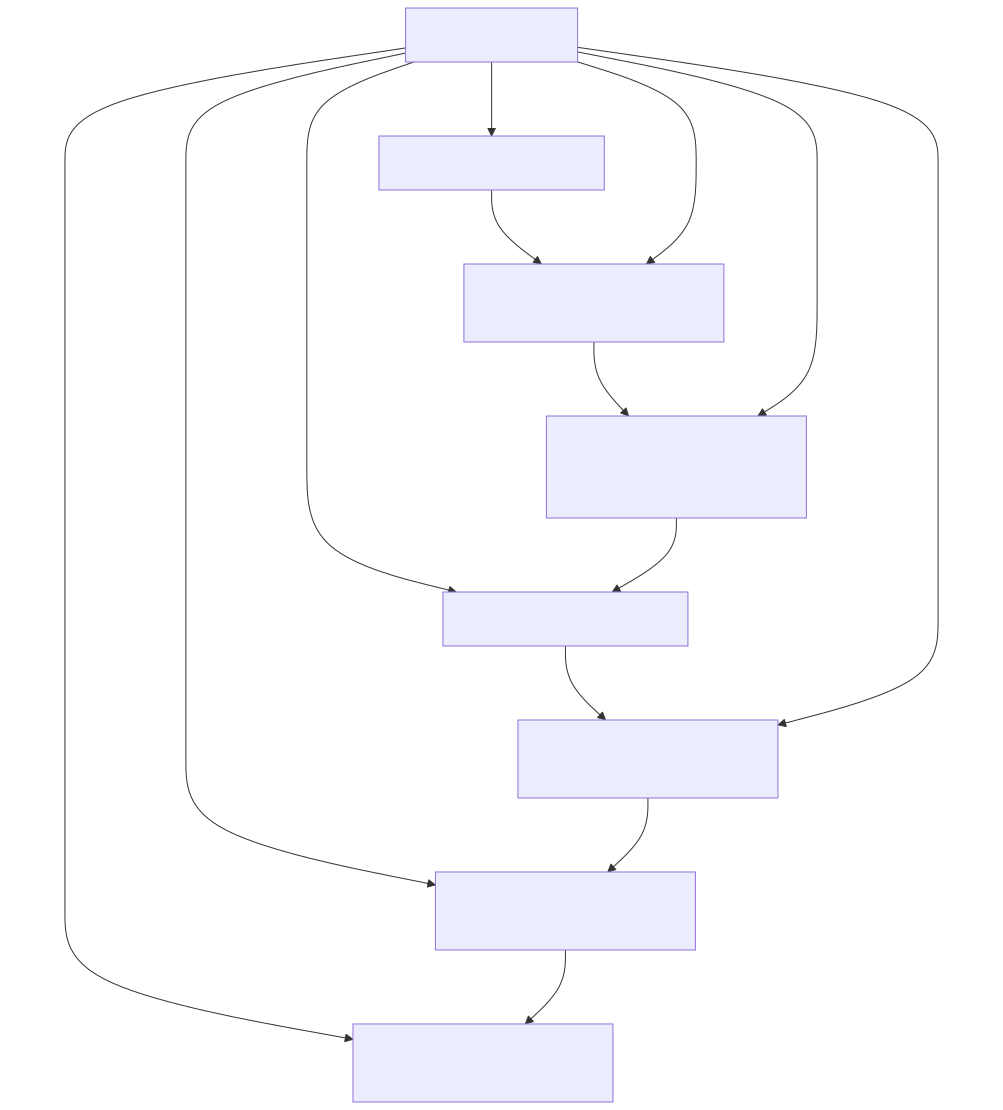

In [129]:
mm(mermaid_syntax)